In [15]:
import sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import skimage
import skimage.io as io

## Create DataFrame to navigate files

In [16]:
FileList=glob('../../data/dt_300/*cut*')
file_id=[i.split("ID")[1].split("_")[2].split('.')[0] for i in FileList]
cut=[i.split("ID")[1].split("_")[-1].split('.')[0] for i in FileList]
FileList

Files_df=pd.DataFrame({"path":FileList,"file_id":file_id,"cut":cut})

In [27]:
Files_df.cut=Files_df.cut.astype('int')
Files_df=Files_df.sort_values(by=['file_id','cut']) 

In [28]:
Files_df.to_csv("../../data/dt_300/File_catalog.csv")

## Calculate RMS contrast

In [8]:
def calculate_contrast(images,ax,cut):
    (frame,row,col)=images.shape
    images_reshaped=images.reshape(frame,row*col)
    images_reshaped=(images_reshaped-np.min(images_reshaped))/(np.max(images_reshaped)-np.min(images_reshaped))
    contrast=np.std(images_reshaped,axis=1)
    ax.plot(contrast,label=cut)
    ax.set_xlim([0,80])
    ax.set_ylim([0,0.04])
    #ax.set_ylim([ymin,ymax])
    ax.legend()

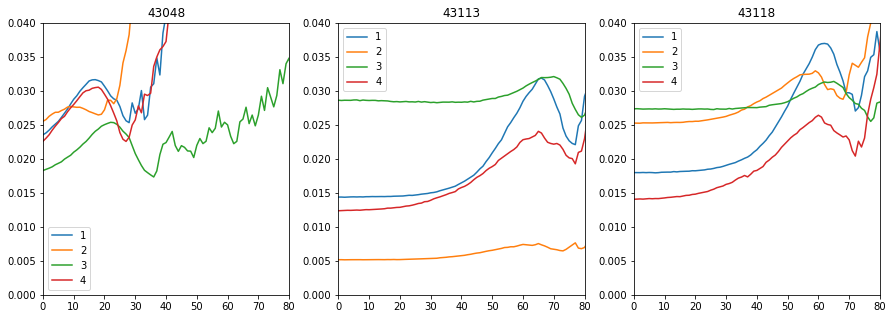

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
axx=ax.ravel()
counter=0


for id, group in Files_df.groupby("file_id"):
    group=group.sort_values(by='cut') 
    for idd in group.index:
        file_path=group.loc[idd].path
        images=io.imread(file_path)
        calculate_contrast(images,axx[counter],group.loc[idd].cut)
        axx[counter].set_title(group.loc[idd].file_id)
    counter=counter+1

In [20]:
Files_df

path file_id  cut
0   ../../data/dt_300/ID_1114_43113.ome_Dark_cut_1...   43113    1
1   ../../data/dt_300/ID_1151_43118.ome_Dark_cut_4...   43118    4
2     ../../data/dt_300/ID_1112_43048_Dark_cut_1.tiff   43048    1
3   ../../data/dt_300/ID_1151_43118.ome_Dark_cut_2...   43118    2
4   ../../data/dt_300/ID_1151_43118.ome_Dark_cut_3...   43118    3
5     ../../data/dt_300/ID_1112_43048_Dark_cut_3.tiff   43048    3
6   ../../data/dt_300/ID_1114_43113.ome_Dark_cut_4...   43113    4
7     ../../data/dt_300/ID_1112_43048_Dark_cut_2.tiff   43048    2
8   ../../data/dt_300/ID_1151_43118.ome_Dark_cut_1...   43118    1
9   ../../data/dt_300/ID_1114_43113.ome_Dark_cut_3...   43113    3
10  ../../data/dt_300/ID_1114_43113.ome_Dark_cut_2...   43113    2
11    ../../data/dt_300/ID_1112_43048_Dark_cut_4.tiff   43048    4

In [29]:
pd.read_csv("../../data/dt_300/File_catalog_frame.csv")

Unnamed: 0                                               path  file_id  \
0            2    ../../data/dt_300/ID_1112_43048_Dark_cut_1.tiff    43048   
1            7    ../../data/dt_300/ID_1112_43048_Dark_cut_2.tiff    43048   
2            5    ../../data/dt_300/ID_1112_43048_Dark_cut_3.tiff    43048   
3           11    ../../data/dt_300/ID_1112_43048_Dark_cut_4.tiff    43048   
4            0  ../../data/dt_300/ID_1114_43113.ome_Dark_cut_1...    43113   
5           10  ../../data/dt_300/ID_1114_43113.ome_Dark_cut_2...    43113   
6            9  ../../data/dt_300/ID_1114_43113.ome_Dark_cut_3...    43113   
7            6  ../../data/dt_300/ID_1114_43113.ome_Dark_cut_4...    43113   
8            8  ../../data/dt_300/ID_1151_43118.ome_Dark_cut_1...    43118   
9            3  ../../data/dt_300/ID_1151_43118.ome_Dark_cut_2...    43118   
10           4  ../../data/dt_300/ID_1151_43118.ome_Dark_cut_3...    43118   
11           1  ../../data/dt_300/ID_1151_43118.ome_Dark_cut_4...    43118   

    cut  frame_stop  
0     1          22  
1     2          12  
2     3          30  
3     4          22  
4     1          64  
5     2          62  
6     3          74  
7     4          67  
8     1          61  
9     2          60  
10    3          70  
11    4          61